In [1]:
library(statsr)
library(dplyr)
library(ggplot2)

Loading required package: BayesFactor
Loading required package: coda
Loading required package: Matrix
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data(kobe_basket)

In [3]:
kobe_streak <- calc_streak(kobe_basket$shot)

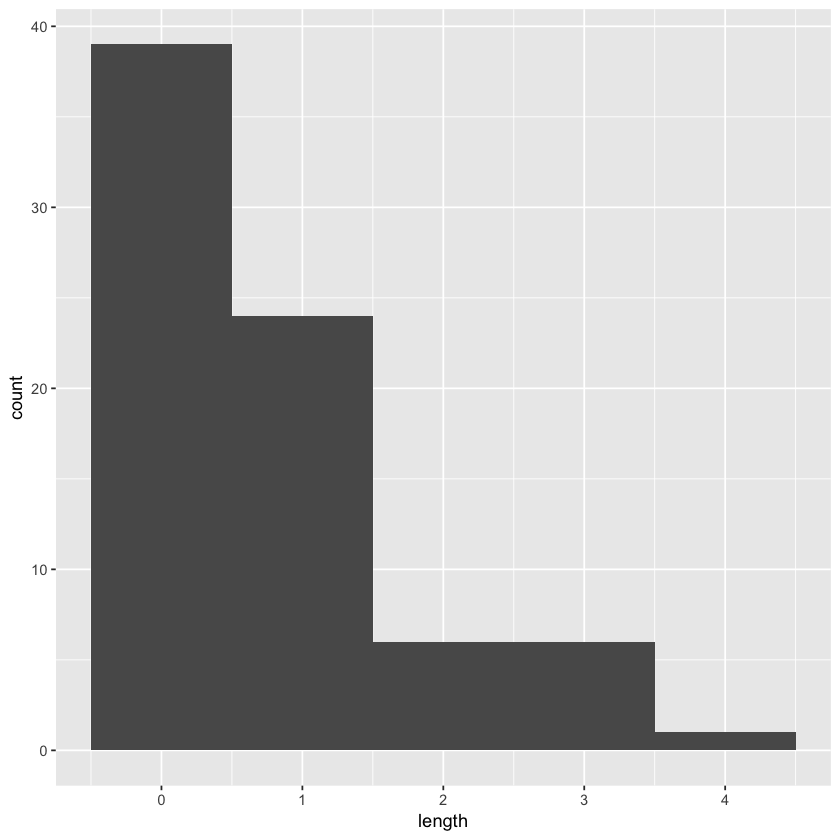

In [4]:
ggplot(data = kobe_streak, aes(x = length)) +
  geom_histogram(binwidth = 1)

# Q: In your simulation of flipping the unfair coin 100 times, how many flips came up heads?

In [5]:
coin_outcomes <- c("heads", "tails")
sample(coin_outcomes, size = 1, replace = TRUE)

[1] "tails"

In [6]:
sim_fair_coin <- sample(coin_outcomes, size = 100, replace = TRUE)

In [7]:
sim_fair_coin

[1] "tails" "tails" "heads" "heads" "tails" "heads" "tails" "tails" "tails"
 [10] "tails" "heads" "tails" "tails" "tails" "tails" "tails" "tails" "tails"
 [19] "heads" "heads" "heads" "tails" "tails" "tails" "heads" "heads" "tails"
 [28] "heads" "heads" "tails" "tails" "heads" "heads" "tails" "heads" "heads"
 [37] "heads" "heads" "heads" "tails" "heads" "tails" "heads" "tails" "heads"
 [46] "tails" "heads" "tails" "heads" "heads" "heads" "heads" "heads" "tails"
 [55] "heads" "tails" "tails" "tails" "tails" "tails" "heads" "heads" "heads"
 [64] "heads" "tails" "tails" "tails" "heads" "heads" "tails" "tails" "heads"
 [73] "tails" "heads" "heads" "tails" "heads" "tails" "heads" "tails" "tails"
 [82] "heads" "heads" "tails" "tails" "tails" "tails" "tails" "heads" "heads"
 [91] "heads" "heads" "tails" "tails" "heads" "heads" "tails" "tails" "tails"
[100] "tails"

In [8]:
table(sim_fair_coin)

sim_fair_coin
heads tails 
   47    53 

In [9]:
sim_unfair_coin <- sample(coin_outcomes, size = 100, replace = TRUE, 
                          prob = c(0.2, 0.8))

In [10]:
table(sim_unfair_coin)

sim_unfair_coin
heads tails 
   26    74 

# A: 26

# Q: What change needs to be made to the sample function so that it reflects a shooting percentage of 45%? Make this adjustment, then run a simulation to sample 133 shots. Assign the output of this simulation to a new object called sim_basket

In [15]:
shot_outcomes <- c("H", "M")
sim_basket <- sample(shot_outcomes, size = 133, replace = TRUE, prob = c(0.45, 0.55))

In [16]:
table(sim_basket)

sim_basket
 H  M 
64 69 

# A. adjust parameter `size` to 133, set `prob` parameter to `c(0.45, 0.55)`

# Q: Using calc_streak, compute the streak lengths of sim_basket, and save the results in a data frame called sim_streak. Note that since the sim_streak object is just a vector and not a variable in a data frame, we don’t need to first select it from a data frame like we did earlier when we calculated the streak lengths for Kobe’s shots.

In [20]:
sim_streak <- calc_streak(sim_basket)

# A: see below

In [21]:
sim_streak

length
1
0
0
1
4
1
0
0
1
0


# Q: Make a plot of the distribution of simulated streak lengths of the independent shooter. What is the typical streak length for this simulated independent shooter with a 45% shooting percentage? How long is the player’s longest streak of baskets in 133 shots?

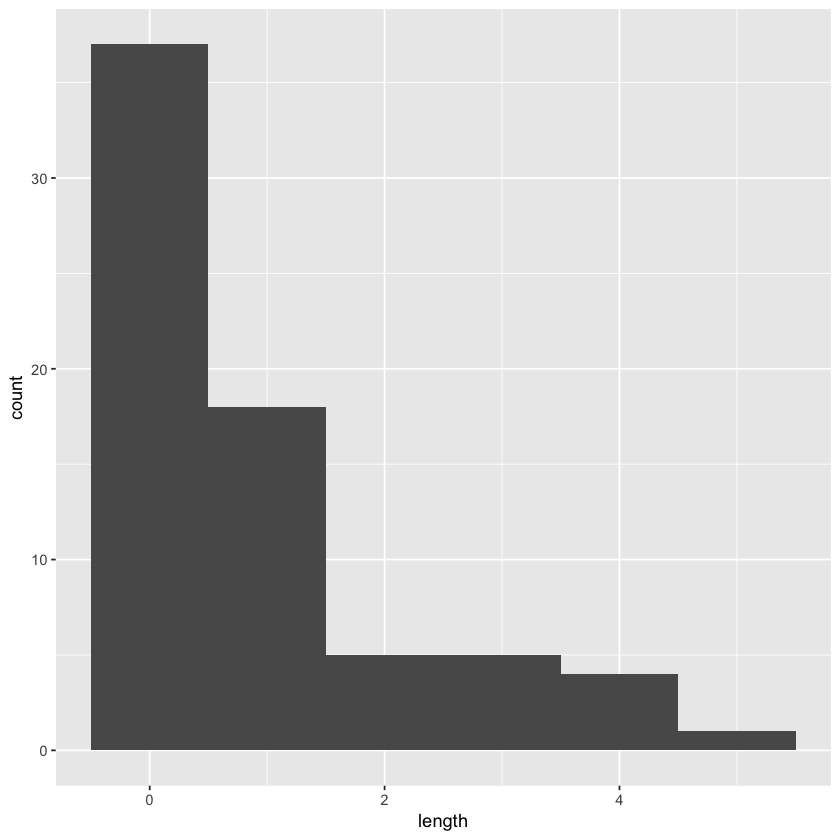

In [23]:
ggplot(data = sim_streak, aes(x = length)) +
  geom_histogram(binwidth = 1)

In [26]:
sim_streak %>% filter(length == max(length))

length
5


# A: The typical streak length is 0 (the mode) and the max streak length is 5 (the max)

# Q: If you were to run the simulation of the independent shooter a second time, how would you expect its streak distribution to compare to the distribution from the exercise above?
1. Exactly the same
2. Somewhat similar
3. Totally different

# A: Somewhat different, the outcomes are being randomly generated

# Q: How does Kobe Bryant’s distribution of streak lengths compare to the distribution of streak lengths for the simulated shooter? Using this comparison, do you have evidence that the hot hand model fits Kobe’s shooting patterns?
1. The distributions look very similar. Therefore, there doesn’t appear to be evidence for Kobe Bryant’s hot hand.
2. The distributions look very similar. Therefore, there appears to be evidence for Kobe Bryant’s hot hand.
3. The distributions look very different. Therefore, there doesn’t appear to be evidence for Kobe Bryant’s hot hand.
4. The distributions look very different. Therefore, there appears to be evidence for Kobe Bryant’s hot hand.

# A: The distributions look very similar. Therefore, there doesn’t appear to be evidence for Kobe Bryant’s hot hand.